# ANN & MNIST : exercise

## 라이브러리 불러오기

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 3018
다음 그림은 숫자 4 입니다.


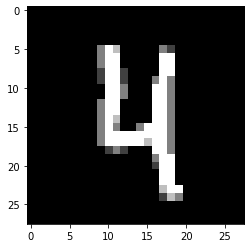

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
#id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [ ]:
# train_x = train_x.reshape([train_x.shape[0],-1])
# test_x = test_x.reshape([test_x.shape[0],-1])

* min-max scaling

In [ ]:
max_n = train_x.max()

In [ ]:
train_x = train_x/max_n
test_x = test_x/max_n

In [ ]:
train_x.max(), train_x.min()

(1.0, 0.0)

* target feature : One-hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

y_len = len(set(train_y))

In [ ]:
train_y = to_categorical(train_y, y_len)
test_y = to_categorical(test_y, y_len)

In [ ]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000, 10))

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [ ]:
########################
# 모델링 I : .fit( ) 까지!
########################
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten()) # 인풋 레이어를 평평하게
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [ ]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es], verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5125 - accuracy: 0.8685 - val_loss: 0.3184 - val_accuracy: 0.9112
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3182 - accuracy: 0.9115 - val_loss: 0.2878 - val_accuracy: 0.9191
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2937 - accuracy: 0.9179 - val_loss: 0.2768 - val_accuracy: 0.9234
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2816 - accuracy: 0.9205 - val_loss: 0.2721 - val_accuracy: 0.9245
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9232 - val_loss: 0.2679 - val_accuracy: 0.9265
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2687 - accuracy: 0.9247 - val_loss: 0.2667 - val_accuracy: 0.9272
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2645 - accuracy: 0.9268 - val_loss: 0.2669 - val_accuracy:

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 93.11%
테스트 정확도 : 92.74%


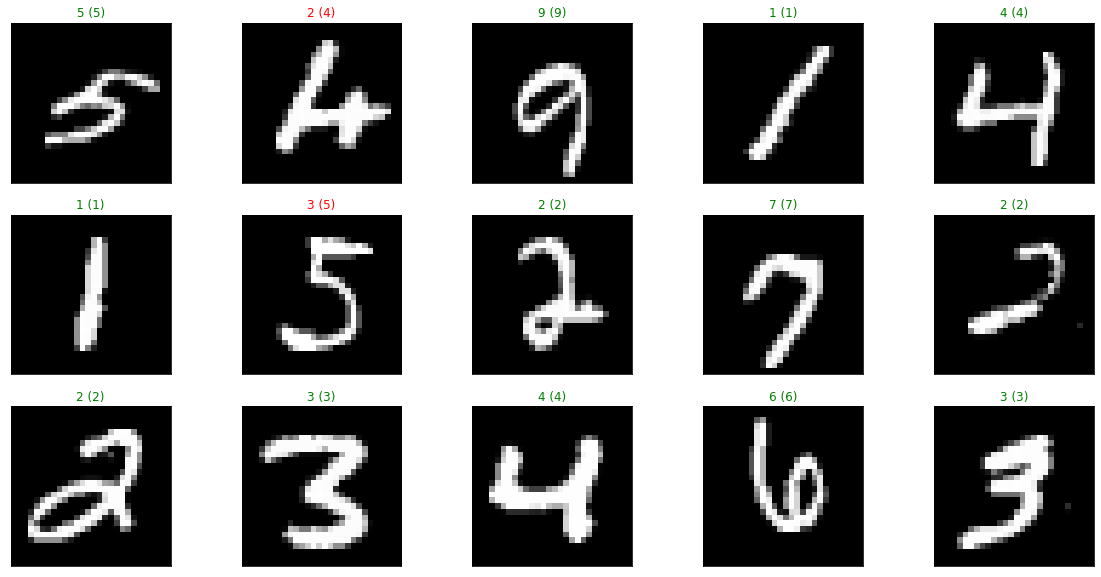

In [ ]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 3558
다음 그림은 숫자 5 입니다.
모델의 예측 : 0
모델의 카테고리별 확률 : [89.  0.  0.  0.  0.  6.  2.  0.  0.  0.]
틀렸어요


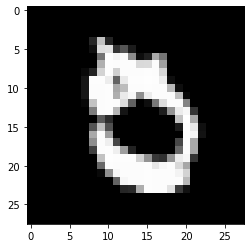

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9274


[0.2645686864852905, 0.9273999929428101]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [ ]:
#########################
# 모델링 II : .fit( ) 까지!
#########################
keras.backend.clear_session()

a = keras.layers.Input(shape=(28,28))
fl = keras.layers.Flatten()(a)
h = keras.layers.Dense(256, activation='relu')(fl)
h = keras.layers.Dense(128, activation='relu')(h)
h = keras.layers.Dense(64, activation='relu')(h)
b = keras.layers.Dense(10, activation='softmax')(h)

model2 = keras.models.Model(a,b)

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [ ]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es], verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2500 - accuracy: 0.9301 - val_loss: 0.2613 - val_accuracy: 0.9302
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9312 - val_loss: 0.2605 - val_accuracy: 0.9308
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2467 - accuracy: 0.9314 - val_loss: 0.2691 - val_accuracy: 0.9271
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2457 - accuracy: 0.9317 - val_loss: 0.2623 - val_accuracy: 0.9297
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2447 - accuracy: 0.9317 - val_loss: 0.2598 - val_accuracy: 0.9302
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2433 - accuracy: 0.9326 - val_loss: 0.2638 - val_accuracy: 0.9300
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2425 - accuracy: 0.9328 - val_loss: 0.2653 - val_accuracy:

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 93.23%
테스트 정확도 : 92.86%


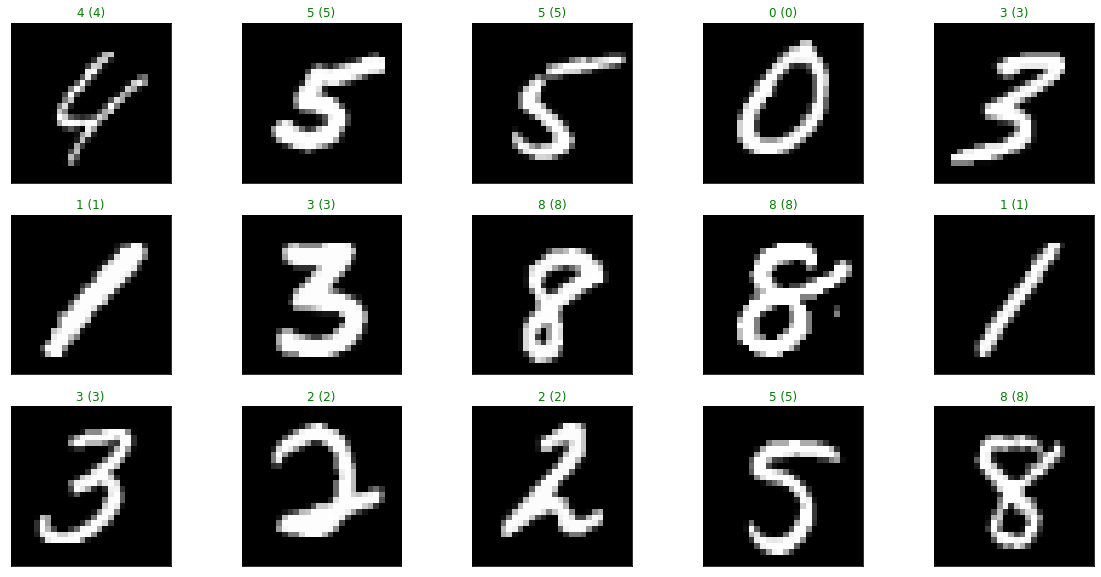

In [ ]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 7459
다음 그림은 숫자 9 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  2. 52.  0.  0. 20. 24.]
틀렸어요


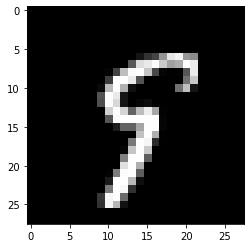

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.9286


[0.26584339141845703, 0.928600013256073]